# Clasificador de Imágenes: Perros vs Gatos (Asirra)

Info: No subire el modelo, porque pesa casi 10 GB pero funciona. (Tuve que hacerlo con Visual Code porque aqui no tira, da un error de que me excedo de 10% de la memoria libre)

## Paso 1: Carga del conjunto de datos

In [1]:
import os
#Para desactivar Cuda, ya que da mil errores...
"""
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
os.environ["XLA_FLAGS"] = "--xla_cpu_use_xla=false"
"""
import shutil
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Rutas
TRAIN_DIR = Path("/workspaces/Proyecto-Tutorial-de-Clasficador-de-Imagenes-1/data/raw/train")
TEST_DIR = Path("/workspaces/Proyecto-Tutorial-de-Clasficador-de-Imagenes-1/data/raw/test1")


2025-05-29 21:35:25.859222: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-29 21:35:25.860594: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-29 21:35:25.864051: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-29 21:35:25.872933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748554525.887514    6010 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748554525.89

## Paso 2: Visualiza la información de entrada

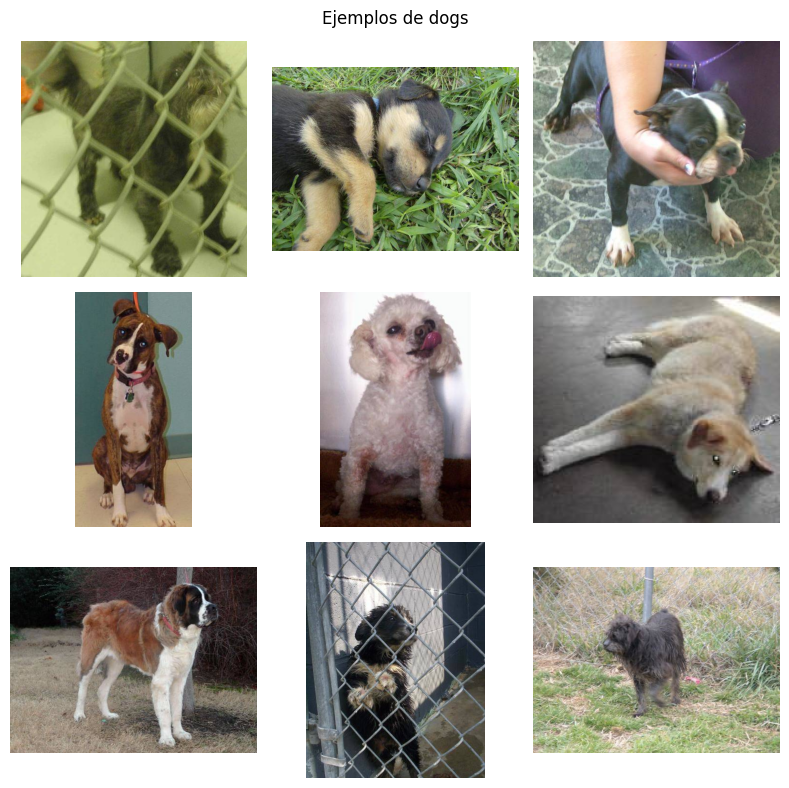

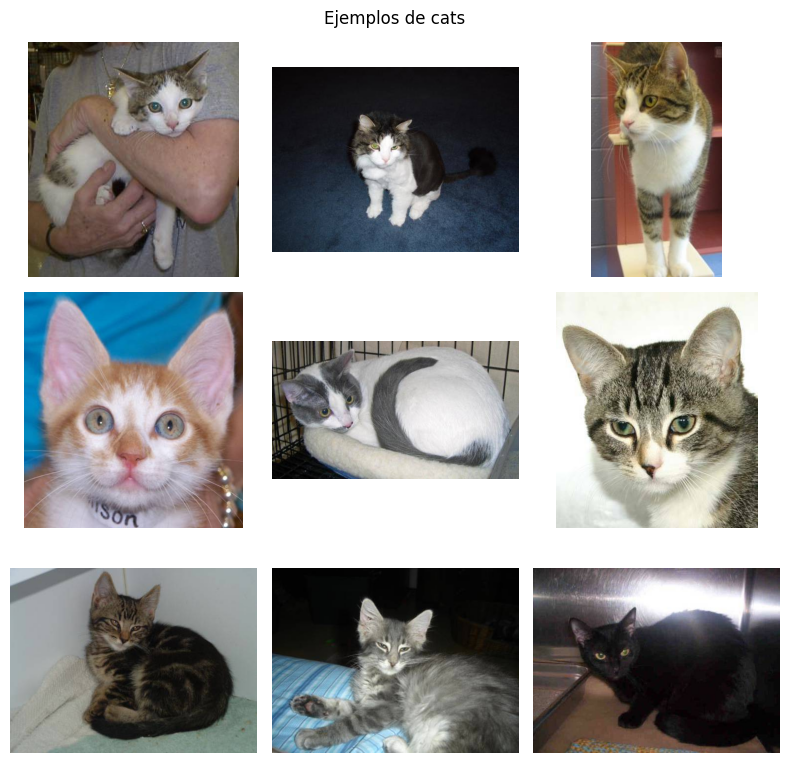

In [2]:
import random
from PIL import Image

def mostrar_imagenes(clase, cantidad=9):
    archivos = list(TRAIN_DIR.glob(f"{clase}.*"))
    seleccionados = random.sample(archivos, cantidad)
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    for img_path, ax in zip(seleccionados, axes.flatten()):
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.axis("off")
    plt.suptitle(f"Ejemplos de {clase}s")
    plt.tight_layout()
    plt.show()

mostrar_imagenes("dog")
mostrar_imagenes("cat")


## Paso 2.1: Preprocesamiento de imágenes y generadores

In [3]:
BASE_DIR = Path("/workspaces/Proyecto-Tutorial-de-Clasficador-de-Imagenes-1/data/processed")
TRAIN_PROC_DIR = BASE_DIR / "train"
VAL_PROC_DIR = BASE_DIR / "val"

# Crear carpetas con estructura para ImageDataGenerator
if not TRAIN_PROC_DIR.exists():
    TRAIN_PROC_DIR.mkdir(parents=True)
    (TRAIN_PROC_DIR / "cats").mkdir()
    (TRAIN_PROC_DIR / "dogs").mkdir()
    for file in TRAIN_DIR.iterdir():
        if "cat" in file.name:
            shutil.copy(file, TRAIN_PROC_DIR / "cats" / file.name)
        elif "dog" in file.name:
            shutil.copy(file, TRAIN_PROC_DIR / "dogs" / file.name)

# Generadores
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = train_gen.flow_from_directory(
    TRAIN_PROC_DIR,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)
val_data = train_gen.flow_from_directory(
    TRAIN_PROC_DIR,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Paso 3: Construcción de la CNN (estilo VGG16)

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(128,128,3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-29 21:34:32.776711: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   134,221,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,646,594 (605.19 MB)

 Trainable params: 158,646,594 (605.19 MB)

 Non-trainable params: 0 (0.00 B)

: 

## Paso 4: Entrenamiento y optimización del modelo

In [ ]:
callbacks = [
    ModelCheckpoint("mejor_modelo.h5", monitor='val_accuracy', verbose = 1, save_best_only=True, save_weights_only = False, mode='auto'),
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True,  verbose = 1, mode = "auto")
]

history = model.fit(
    train_data,
    steps_per_epoch = 100,
    validation_data=val_data,
    validation_steps = 10,
    epochs=3,
    callbacks=callbacks
)


/home/vscode/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3


## Paso 5: Evaluación y guardado del modelo

In [ ]:
model.save("modelo_final.h5")
print("Modelo guardado como modelo_final.h5")


## Paso 6: Testeo

In [ ]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("/workspaces/Proyecto-Tutorial-de-Clasficador-de-Imagenes-1/data/raw/test1/11.jpg", target_size = (128, 128))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("modelo_final.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")